In [1]:
import time
import os

import numpy as np
from diffrax import diffeqsolve, ODETerm, Dopri5, SaveAt, Kvaerno5, Kvaerno4, PIDController
import jax.numpy as jnp
import jax


import matplotlib.pyplot as plt

from rosenbrock import Rosenbrock23
from rodas5 import Rodas5


mu = 200
t0, t1 = 0., 3*mu
y0 = jnp.array([2., 0.])

rtol = 1e-7
atol = 1e-7

def f(t, y, args):
    return jnp.array([y[1], mu*(1-y[0]**2)*y[1]-y[0]])



N = 100

stepsize_controller = PIDController(rtol=rtol, atol=atol)
term = ODETerm(f)
kvaerno5 = Kvaerno5()
kvaerno4 = Kvaerno4()
rosenbrock23 = Rosenbrock23()
rodas5 = Rodas5()
T_end = t1
stepsize = T_end/N
saveat = SaveAt(ts=list(np.arange(0, T_end, stepsize)))


In [2]:
jax.jacfwd(lambda y: term.vf(t=0, y=y, args=None))(y0)

Array([[   0.,    1.],
       [  -1., -600.]], dtype=float32)

In [3]:
control = term.contr(t0, t1)
type(control)

float

In [7]:
# start = time.time()
# sol_kvaerno4 = diffeqsolve(term, kvaerno4, t0=0, t1=T_end, dt0=stepsize, y0=y0, saveat=saveat, stepsize_controller=stepsize_controller, max_steps=100000)
# end = time.time()
# print("Kvaerno4 time: ", end-start)

start = time.time()
sol_kvaerno5 = diffeqsolve(term, kvaerno5, t0=0, t1=T_end, dt0=stepsize, y0=y0, saveat=saveat, stepsize_controller=stepsize_controller, max_steps=100000)
end = time.time()
print("Kvaerno5 time: ", end-start)

# start = time.time()
# sol_rosenbrock23 = diffeqsolve(term, rosenbrock23, t0=0, t1=T_end, dt0=stepsize, y0=y0, saveat=saveat, stepsize_controller=stepsize_controller, max_steps=1000000)
# end = time.time()
# print("Rosenbrock23 time: ", end-start)

start = time.time()
sol_rodas5 = diffeqsolve(term, rodas5, t0=0, t1=T_end, dt0=stepsize, y0=y0, saveat=saveat, stepsize_controller=stepsize_controller, max_steps=10000000)
end = time.time()
print("Rodas5 time: ", end-start)



Kvaerno5 time:  4.720743656158447
Rodas5 time:  0.13681435585021973


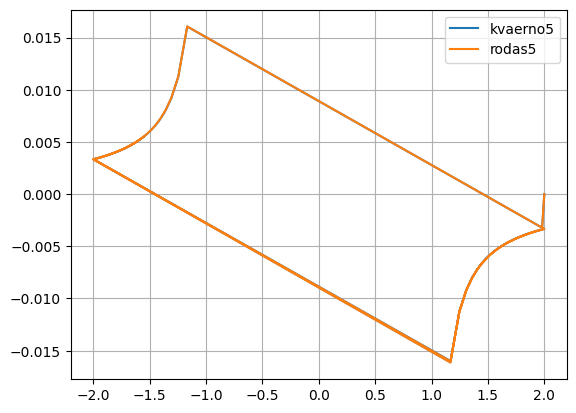

In [8]:
#plt.plot(sol_kvaerno4.ys[:,0], sol_kvaerno4.ys[:,1])
plt.plot(sol_kvaerno5.ys[:,0], sol_kvaerno5.ys[:,1], label="kvaerno5")
#plt.plot(sol_rosenbrock23.ys[:,0], sol_rosenbrock23.ys[:,1], label="rosenbrock23")
plt.plot(sol_rodas5.ys[:,0], sol_rodas5.ys[:,1], label="rodas5")

plt.grid()
plt.legend()

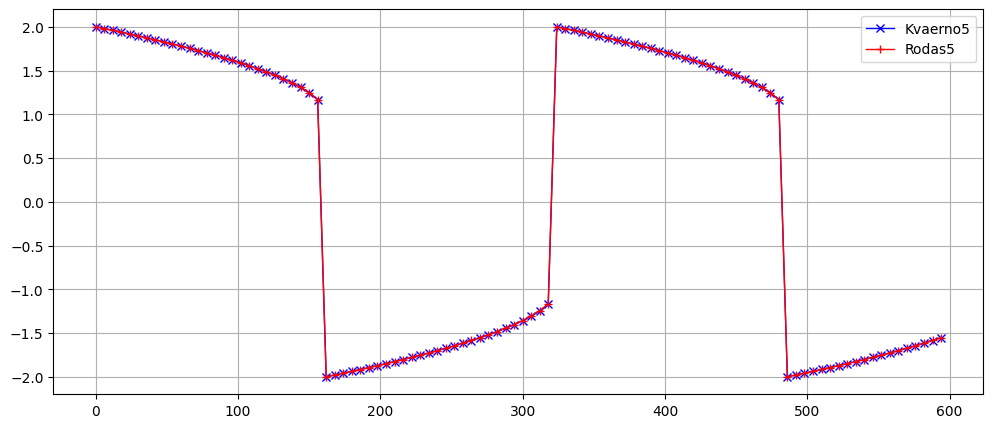

In [10]:

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(sol_kvaerno5.ts, sol_kvaerno5.ys[:,0], 'bx-', lw=1, label="Kvaerno5")
ax.plot(sol_rodas5.ts, sol_rodas5.ys[:,0], 'r+-', lw=1, label="Rodas5")

ax.legend()
ax.grid()